In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="ticks")

In [3]:
data_wine = pd.read_csv("./WineQT.csv", sep=',')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [5]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
# sns.pairplot(data=data_wine)

In [8]:
corr = data_wine.corr()

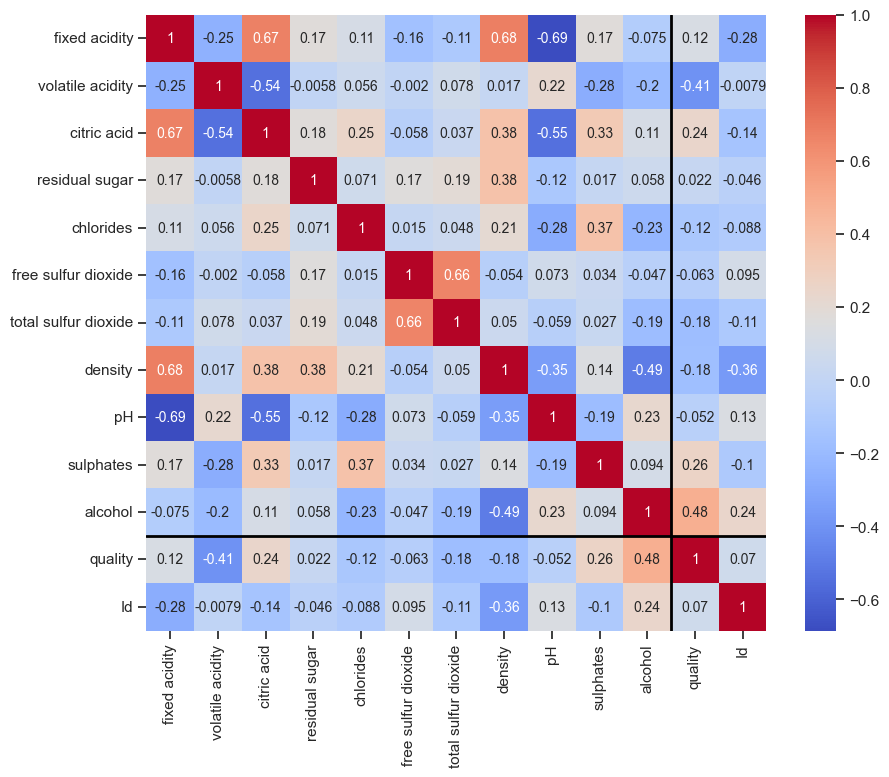

In [9]:
plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 10})

quality_index = corr.index.get_loc('quality')

plt.axhline(quality_index, color='black', linewidth=2)
plt.axvline(quality_index, color='black', linewidth=2)

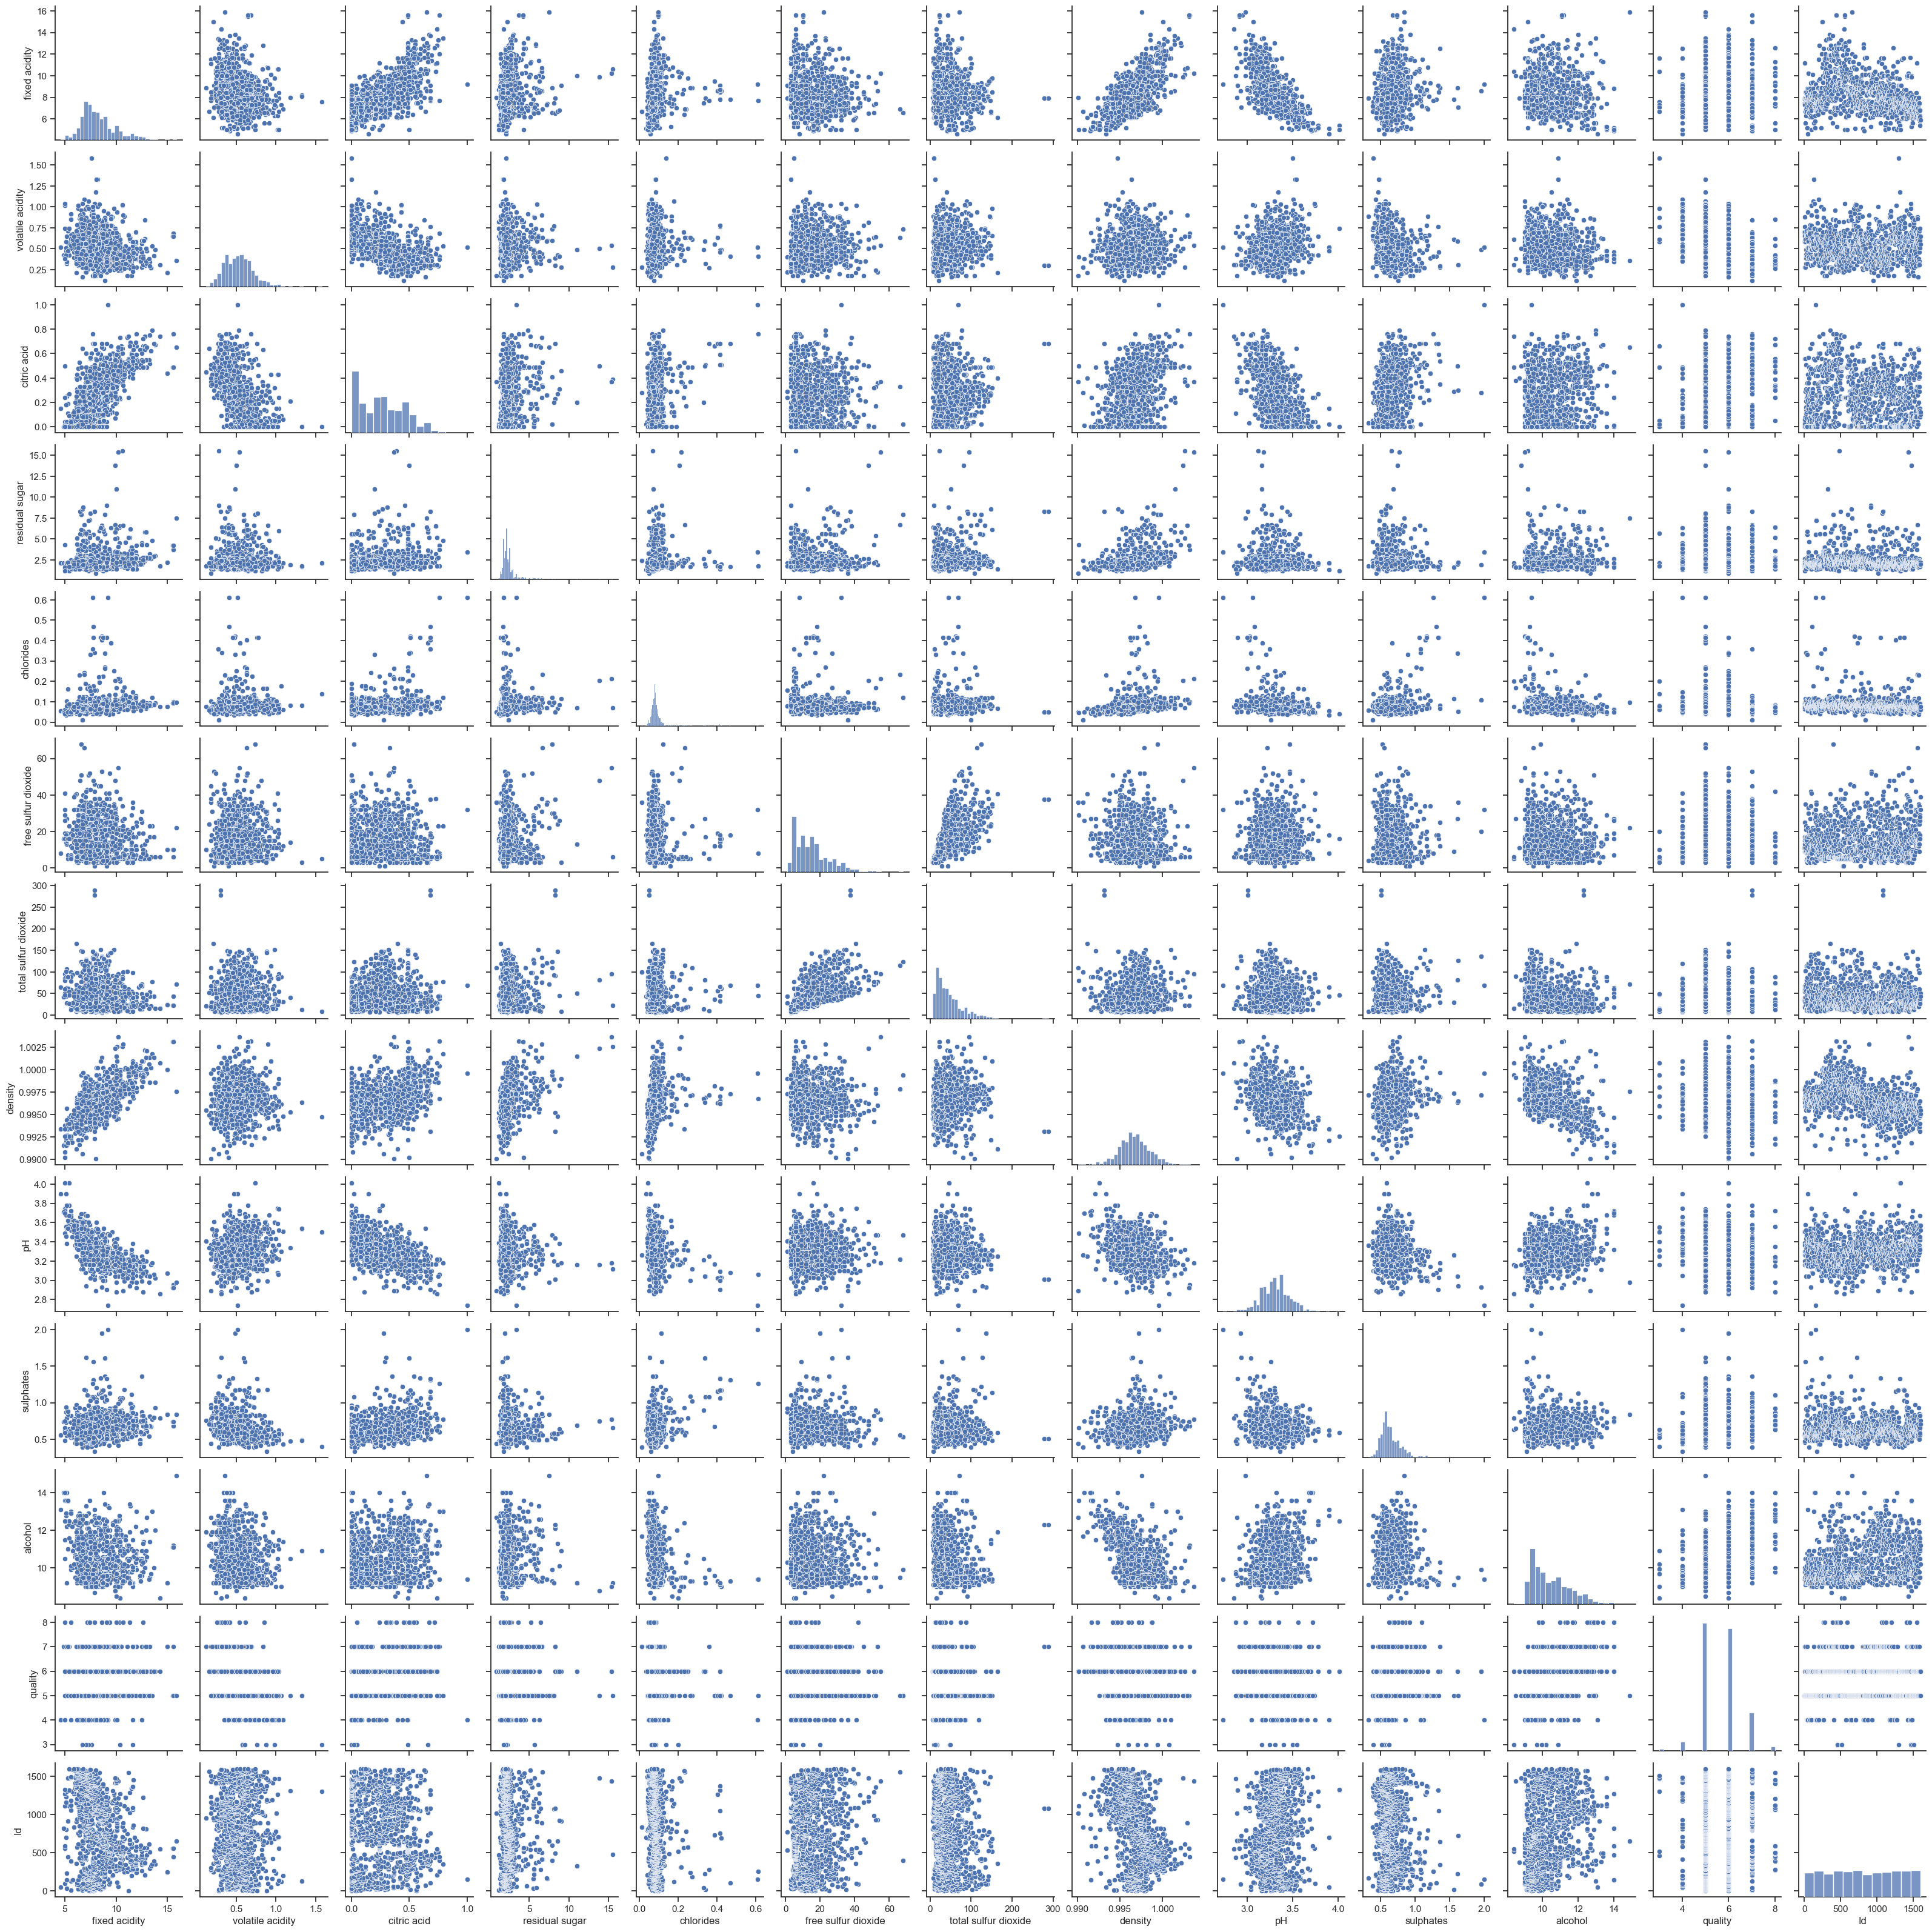

In [24]:
sns.pairplot(data=data_wine)

In [10]:
data_X = data_wine.drop("quality", axis=1)
data_y = data_wine["quality"]

In [11]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1, stratify=data_y)

1. Логистическая регрессия

In [12]:
from typing import Dict


def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [13]:
from typing import Tuple

def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [14]:
print_class_proportions(data_y)

Метка 	 Количество 	 Процент встречаемости
3 	 6 	 	 0.52%
4 	 33 	 	 2.89%
5 	 483 	 	 42.26%
6 	 462 	 	 40.42%
7 	 143 	 	 12.51%
8 	 16 	 	 1.4%


In [15]:
log_reg = LogisticRegression(multi_class="multinomial", class_weight="balanced")

In [16]:
param_grid = {'max_iter': [10000, 100000, 1000000, 5000000]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(data_X, data_y)

grid_search.best_params_

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

{'max_iter': 100000}

In [17]:
log_reg = LogisticRegression(multi_class="multinomial", max_iter=grid_search.best_params_['max_iter'])

In [18]:
log_reg.fit(data_X_train, data_y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000, multi_class='multinomial')

In [19]:
y_pred_log_reg = log_reg.predict(data_X_test)

In [20]:
y_pred_log_reg

array([6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 7, 6,
       6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 6, 7, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 5,
       6, 6, 7, 5, 6, 5, 7, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 5], dtype=int64)

In [21]:
accuracy_score(data_y_test, y_pred_log_reg)

0.5938864628820961

In [22]:
print_accuracy_score_for_classes(data_y_test, y_pred_log_reg)

Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.7628865979381443
6 	 0.6195652173913043
7 	 0.1724137931034483
8 	 0.0


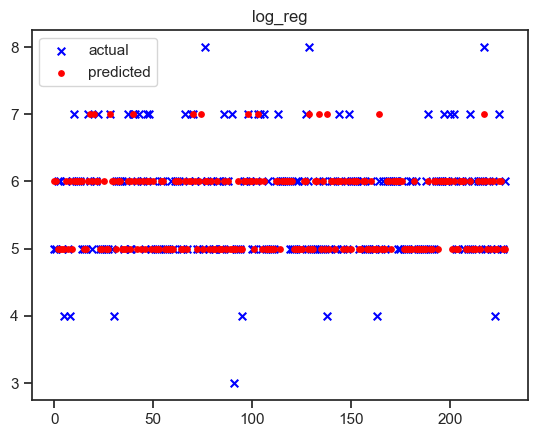

In [23]:
def plotGraph(y_test,y_pred,regressorName):
    plt.scatter(range(len(y_test)), y_test, color='blue', marker="x", s=30)
    plt.scatter(range(len(y_pred)), y_pred, color='red', marker="o", s=15)
    plt.title(regressorName)
    plt.legend(["actual", "predicted"])
    plt.show()
    return

plotGraph(data_y_test, y_pred_log_reg, "log_reg")